In [7]:
import fastf1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
fastf1.Cache.enable_cache('.cache')

session = fastf1.get_session(2025, 'Australia', 'Q')

session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


In [8]:
laps = session.laps.pick_drivers('VER')
fastest_lap = laps.pick_fastest()

In [9]:
telemetry = fastest_lap.get_car_data().add_distance()


In [10]:
telemetry

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-03-15 05:58:21.897,11350.0,319.0,8,100.0,False,12,car,0 days 00:00:00.122000,0 days 01:10:50.298000,10.810556
1,2025-03-15 05:58:22.057,11369.0,320.0,8,100.0,False,12,car,0 days 00:00:00.282000,0 days 01:10:50.458000,25.032778
2,2025-03-15 05:58:22.457,11423.0,323.0,8,100.0,False,12,car,0 days 00:00:00.682000,0 days 01:10:50.858000,60.921667
3,2025-03-15 05:58:22.937,11532.0,325.0,8,100.0,False,12,car,0 days 00:00:01.162000,0 days 01:10:51.338000,104.255000
4,2025-03-15 05:58:23.096,11603.0,327.0,8,100.0,False,12,car,0 days 00:00:01.321000,0 days 01:10:51.497000,118.697500
...,...,...,...,...,...,...,...,...,...,...,...
272,2025-03-15 05:59:35.858,10665.0,297.0,8,100.0,False,12,car,0 days 00:01:14.083000,0 days 01:12:04.259000,5109.450278
273,2025-03-15 05:59:36.017,10726.0,300.0,8,100.0,False,12,car,0 days 00:01:14.242000,0 days 01:12:04.418000,5122.700278
274,2025-03-15 05:59:36.217,10807.0,303.0,8,100.0,False,12,car,0 days 00:01:14.442000,0 days 01:12:04.618000,5139.533611
275,2025-03-15 05:59:36.577,10931.0,306.0,8,100.0,False,12,car,0 days 00:01:14.802000,0 days 01:12:04.978000,5170.133611


In [11]:
# Get fastest laps
ver_lap = session.laps.pick_drivers('VER').pick_fastest()
lawson_lap = session.laps.pick_drivers('LAW').pick_fastest()

In [12]:
# Get telemetry and add distance
ver_tel = ver_lap.get_telemetry().add_distance()
law_tel = lawson_lap.get_telemetry().add_distance()

In [13]:
# Normalize colors based on speed
norm_ver = mcolors.Normalize(vmin=ver_tel['Speed'].min(), vmax=ver_tel['Speed'].max())
norm_law = mcolors.Normalize(vmin=law_tel['Speed'].min(), vmax=law_tel['Speed'].max())
cmap = cm.plasma  # or any other colormap like 'viridis', 'turbo', 'cool'

NameError: name 'norm' is not defined

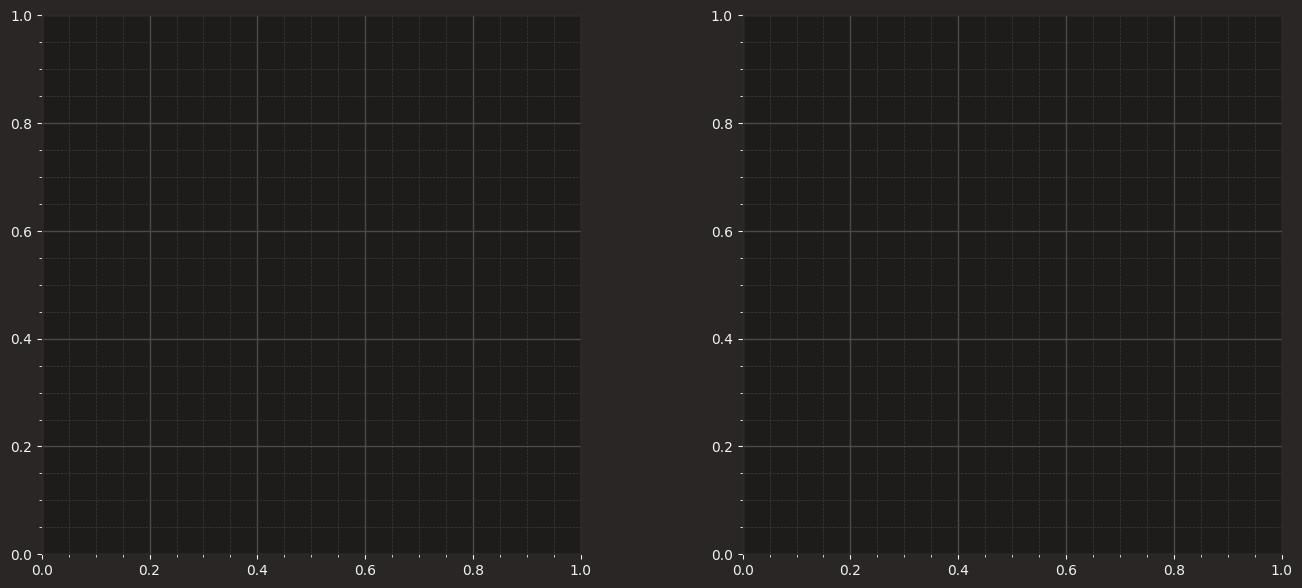

In [16]:
# Create two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 7),
    gridspec_kw={'wspace': 0.3}  # horizontal space between subplots
)

# -------------------------
# LEFT SUBPLOT (Verstappen)
# -------------------------
sc1 = ax1.scatter(
    ver_tel['X'], ver_tel['Y'],
    c=ver_tel['Speed'],
    cmap=cmap,
    norm=norm,
    s=4
)
ax1.set_title('Max Verstappen - Fastest Lap')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.axis('equal')

# -----------------------
# RIGHT SUBPLOT (Lawson)
# -----------------------
sc2 = ax2.scatter(
    law_tel['X'], law_tel['Y'],
    c=law_tel['Speed'],
    cmap=cmap,
    norm=norm,
    s=4
)
ax2.set_title('Liam Lawson - Fastest Lap')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
ax2.axis('equal')

# --------------------------------------
# MANUAL COLORBAR AXIS IN THE "MIDDLE"
# --------------------------------------
# [left, bottom, width, height] in figure-relative coordinates
# Decrease left from 0.45 -> 0.44, 0.43, etc. to nudge it more left.
cax = fig.add_axes([0.45, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sc1, cax=cax)
cbar.set_label('Speed (km/h)')

# Overall title
fig.suptitle('Speed Track Maps', fontsize=16)
plt.show()

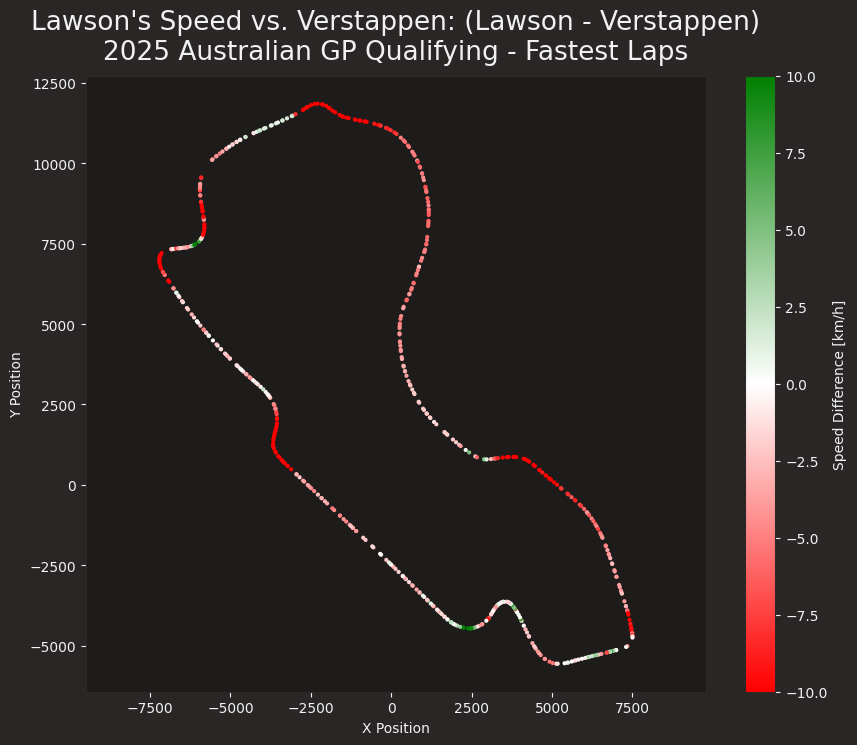

In [ ]:
# Sort telemetry by distance so we can merge them
ver_tel_sorted = ver_tel.sort_values(by='Distance').reset_index(drop=True)
law_tel_sorted = law_tel.sort_values(by='Distance').reset_index(drop=True)

# Merge Lawson's data to nearest distance in Verstappen's data
merged = pd.merge_asof(
    law_tel_sorted, 
    ver_tel_sorted,
    on='Distance',
    direction='nearest',
    suffixes=('_LAW', '_VER')
)

# Calculate speed difference
merged['SpeedDiff'] = merged['Speed_LAW'] - merged['Speed_VER']

# Custom diverging colormap: red -> white -> green
# negative => red, zero => white, positive => green
my_colors = ["red", "white", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", my_colors)

# TwoSlopeNorm ensures 0 is in the middle (white)
speed_diff_min = merged['SpeedDiff'].min()
speed_diff_max = merged['SpeedDiff'].max()
div_norm = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)

# Plot Lawson's position colored by SpeedDiff
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    merged['X_LAW'], merged['Y_LAW'],
    c=merged['SpeedDiff'],
    cmap=custom_cmap,
    norm=div_norm,
    s=4
)

plt.axis('equal')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Lawson's Speed vs. Verstappen: (Lawson - Verstappen)\n2025 Australian GP Qualifying - Fastest Laps")

# Colorbar
cbar = plt.colorbar(scatter, label='Speed Difference [km/h]')
plt.show()

c:\Users\ricar\Desktop\Workspace\GridAI\venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\ricar\Desktop\Workspace\GridAI\venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to

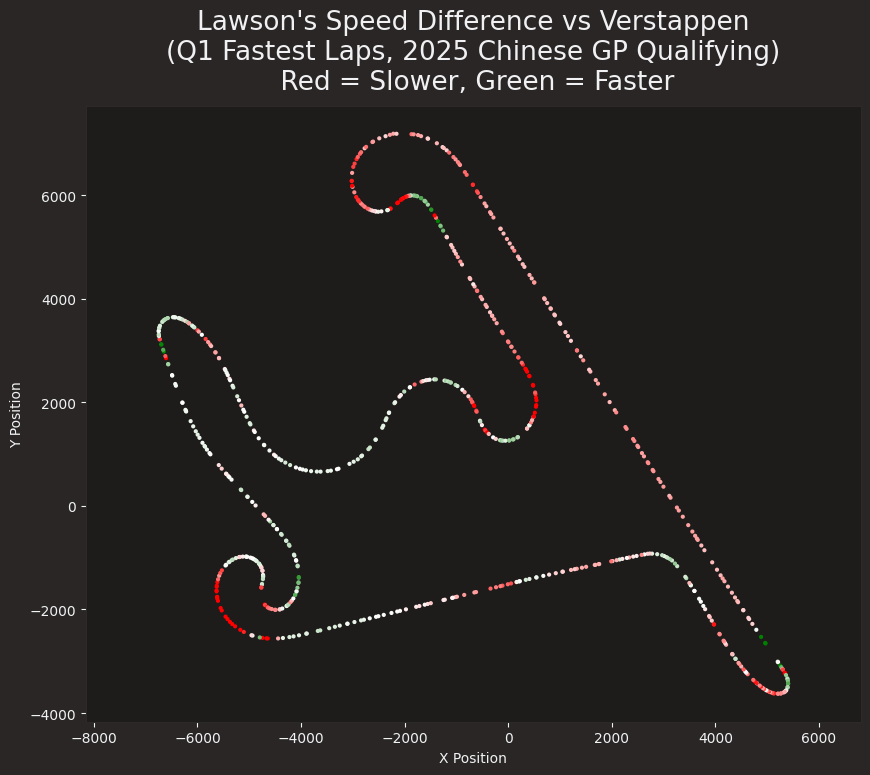

In [17]:
import fastf1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Enable caching and set up FastF1 plotting style
fastf1.Cache.enable_cache('.cache')
plotting.setup_mpl()

# Load the qualifying session for the 2025 Australian Grand Prix
session = fastf1.get_session(2025, 'Chinese Grand Prix', 'Q')
session.load()

# Get all laps and split them into Q1, Q2, Q3
laps = session.laps
q1, q2, q3 = laps.split_qualifying_sessions()

# For Q1, pick the fastest lap for Verstappen and Lawson
ver_q1 = q1[q1['Driver'] == 'VER'].pick_fastest()
law_q1 = q1[q1['Driver'] == 'LAW'].pick_fastest()

# Retrieve telemetry data (includes X, Y, Speed, Distance)
ver_tel = ver_q1.get_telemetry().add_distance()
law_tel = law_q1.get_telemetry().add_distance()

# Sort telemetry data by Distance (required for merging)
ver_tel_sorted = ver_tel.sort_values(by='Distance').reset_index(drop=True)
law_tel_sorted = law_tel.sort_values(by='Distance').reset_index(drop=True)

# Merge Lawson's telemetry with Verstappen's on the nearest Distance
merged = pd.merge_asof(
    law_tel_sorted,
    ver_tel_sorted,
    on='Distance',
    direction='nearest',
    suffixes=('_LAW', '_VER')
)

# Calculate the speed difference: positive means Lawson was faster, negative slower.
merged['SpeedDiff'] = merged['Speed_LAW'] - merged['Speed_VER']

# Create a custom diverging colormap: red (negative) -> white (zero) -> green (positive)
my_colors = ["red", "white", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", my_colors)

# Center the colormap at 0 using TwoSlopeNorm
div_norm = mcolors.TwoSlopeNorm(
    vmin=merged['SpeedDiff'].min() / 3,
    vcenter=0,
    vmax=merged['SpeedDiff'].max() / 3
)

# Plot Lawson's track map with the speed difference color coding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    merged['X_LAW'], merged['Y_LAW'],
    c=merged['SpeedDiff'],
    cmap=custom_cmap,
    norm=div_norm,
    s=4
)
plt.axis('equal')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Lawson's Speed Difference vs Verstappen\n(Q1 Fastest Laps, 2025 Chinese GP Qualifying)\n Red = Slower, Green = Faster")
#cbar = plt.colorbar(scatter, label='Speed Difference (Lawson - Verstappen) [km/h]')
plt.show()
